# EDA on Netflix dataset

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [2]:
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"

Cloning into 'Datasets'...
remote: Enumerating objects: 327, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 327 (delta 20), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (327/327), 302.68 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Updating files: 100% (241/241), done.


In [3]:
# Data loading
path = '/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv'
df = pd.read_csv( path )
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7148,s7149,TV Show,Too Hot to Handle,NaN,Desiree Burch,United States,"April 17, 2020",2020,TV-MA,1 Season,"Reality TV, Romantic TV Shows","On the shores of paradise, gorgeous singles me..."
166,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,R,101 min,"Dramas, Romantic Movies",At the center of this engrossing melodrama is ...
5607,s5608,Movie,Silicon Cowboys,Jason Cohen,NaN,United States,"April 1, 2017",2016,TV-PG,77 min,Documentaries,This documentary tells the story of Compaq Com...
1658,s1659,TV Show,Deadwind,NaN,"Pihla Viitala, Lauri Tilkanen, Jani Volanen, T...","Finland, Germany","July 1, 2020",2020,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas","Just months after a tragic loss, detective Sof..."
6124,s6125,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Using breakthroughs in technology and neurosci...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


## Alerts:
- date_added of object type needs to be converted to datetime type

- missing values: director, cast, country, date_added, rating

# Data Cleaning and Transformation

In [6]:
# 1.  Handle Missing values in Director country, and cast
df.director = df.director.fillna( 'Unknown' )
df.cast = df.cast.fillna( 'Unknown' )
df.country = df.country.fillna( 'Unknown' )


In [7]:
# 2. Drop the few rows with missing 'date_added' and 'rating'
print( f' before deleting: {df.shape}' )

df.dropna(
    subset=['date_added', 'rating'],
    inplace=True
)

print( f' after deleting: {df.shape}' )

 before deleting: (7787, 12)
 after deleting: (7770, 12)


In [8]:
# 3. Convert 'date_added' to a datetime format

df.date_added = pd.to_datetime( df.date_added , format= 'mixed' , dayfirst=False )

In [9]:
# 4. Creating a new feature for year and month added
df['year_added'] = df.date_added.dt.year
df['month_added'] = df.date_added.dt.month

# Data Exploration and Visualization

- Distribution of content type?


<Axes: ylabel='count'>

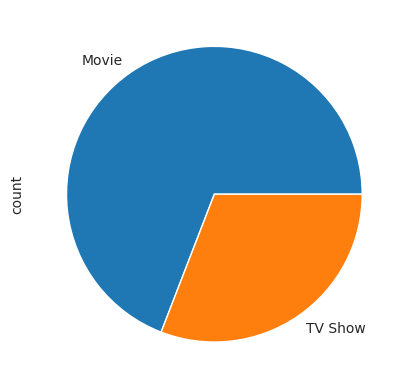

In [10]:
df.type.value_counts().plot( kind='pie' )

- How has the content been added over time?

<Axes: xlabel='year_added'>

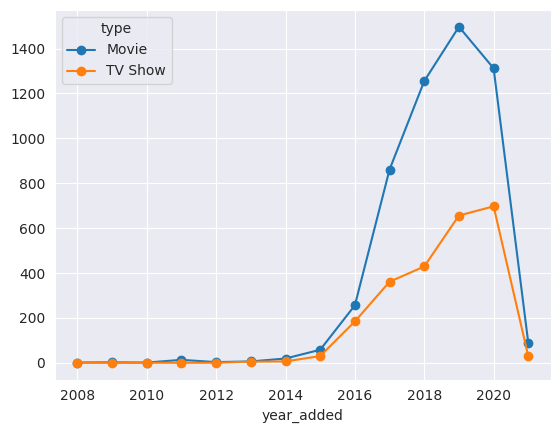

In [11]:
df.groupby(
    ['year_added', 'type' ]
 ).size().unstack().fillna(0).plot( kind='line', marker='o' )

In [12]:
# What is the most popular genre?
df.listed_in.str.split(', ').explode()



,listed_in
0,International TV Shows
0,TV Dramas
0,TV Sci-Fi & Fantasy
1,Dramas
1,International Movies
...,...
7784,Music & Musicals
7785,International TV Shows
7785,Reality TV
7786,Documentaries


In [13]:
genres = df.assign( genre=df.listed_in.str.split(', ') ).explode('genre')

<Axes: ylabel='genre'>

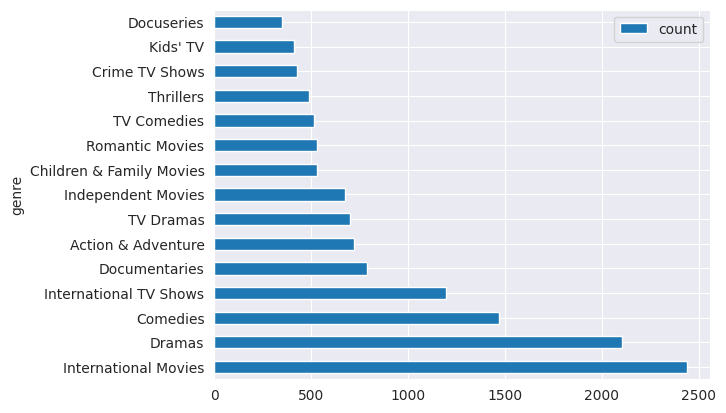

In [14]:
# Get the top 15 genres
genres.genre.value_counts().reset_index().iloc[0:15,:].plot( kind='barh', x='genre' )

In [15]:
# Distribution of content duration
movies = df[ df.type == 'Movie' ].copy()
tv_shows = df[ df.type == 'TV Show' ].copy()

In [16]:
movies.duration = movies.duration.str.replace( ' min' , '' ).astype(int)


In [17]:
tv_shows.duration = tv_shows.duration.str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

<Axes: xlabel='duration', ylabel='Count'>

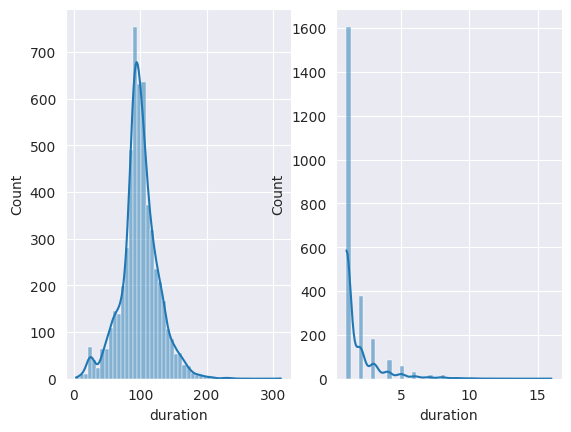

In [18]:
fig, axes = plt.subplots( 1,2 )
sns.histplot( ax=axes[0] ,data=movies,x='duration', bins=50, kde=True  )
sns.histplot( ax=axes[1] ,data=tv_shows, bins=50, x='duration', kde=True  )

In [19]:
# Where does the content come from
countries = df.assign(
    country = df.country.str.split( ', ' ).explode('country')
)

In [20]:
top = countries.country.value_counts().reset_index()
top.columns = [ 'country' , 'count' ]

In [21]:
top

,country,count
0,United States,2673
1,India,872
2,United Kingdom,561
3,Unknown,422
4,Canada,318
...,...,...
108,Cyprus,1
109,Kazakhstan,1
110,Malawi,1
111,Slovakia,1


<Axes: xlabel='count', ylabel='country'>

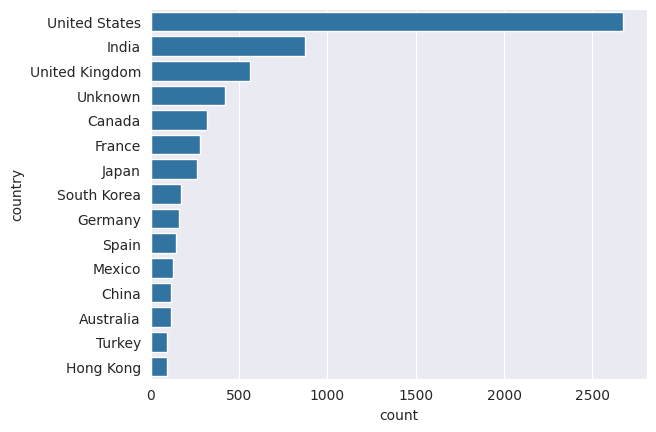

In [22]:
sns.barplot(top.iloc[0:15,:], y='country', x='count' )

/tmp/ipython-input-2135779456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='count', ylabel='rating'>

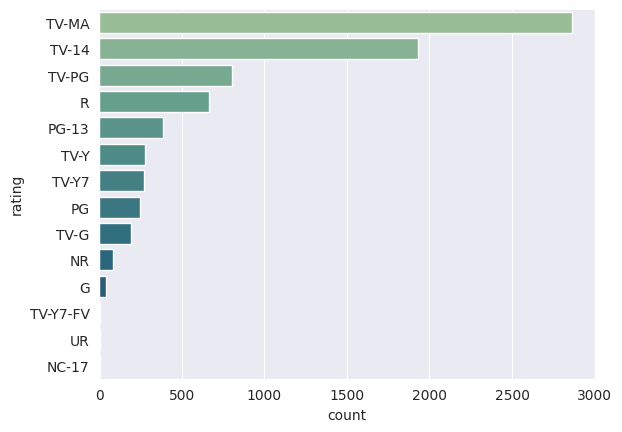

In [23]:
# What are the maturity ratings of the content?
sns.countplot(
    y='rating', data= df, order= df['rating'].value_counts().index, palette='crest', legend= False
)

# Feature Engineering

In [24]:
# create a new column 'age_on_netflix' feature

df['age_on_netflix'] = df.year_added - df.release_year

<Axes: xlabel='age_on_netflix', ylabel='Count'>

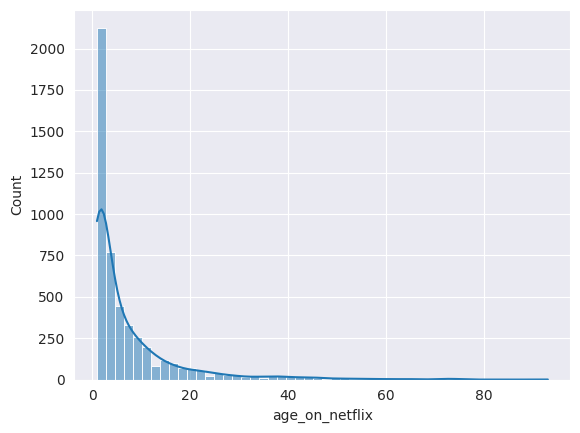

In [25]:
# Filter out any potential errors, when added year is before release year

content_age = df[ df.age_on_netflix > 0 ]
sns.histplot( data=content_age, x='age_on_netflix', bins=50, kde= True )

## Deeper multivariate analysis

In [26]:
top_genres = genres.genre.value_counts().index[:5]; top_genres

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries'],
      dtype='object', name='genre')

In [27]:

genres_movies = genres[ ( genres['type'] == 'Movie') & (genres.genre.isin(top_genres))  ].copy()
genres_movies['duration_min'] = genres_movies.duration.str.replace(' min', '').astype(int)

<Axes: xlabel='duration_min', ylabel='genre'>

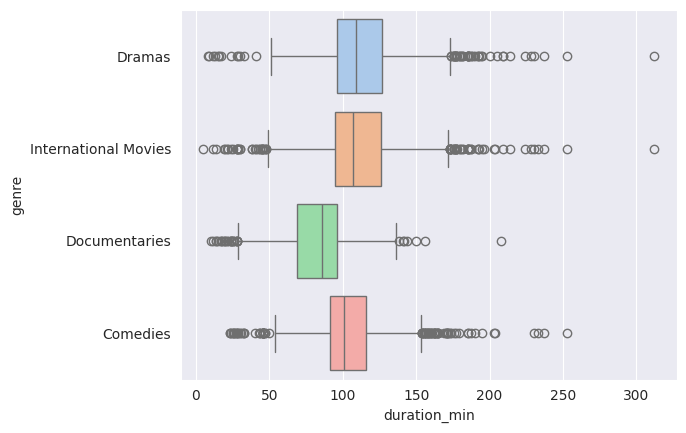

In [28]:
sns.boxplot(
    y='genre', x='duration_min', data=genres_movies, palette='pastel', hue='genre'
)

In [29]:
# Word CLoud

text = '|'.join(df.description)

In [30]:
text

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.|After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.|When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that\'s haunting their jungle island training camp.|In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.|A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.|A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.|After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before 

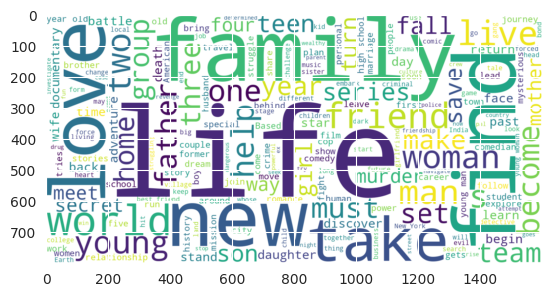

In [31]:
plt.imshow( WordCloud(
    width = 2*800, height=2*400,
    background_color='white',
    min_font_size=5,
).generate(text) , interpolation='bilinear')

# Submission Questions

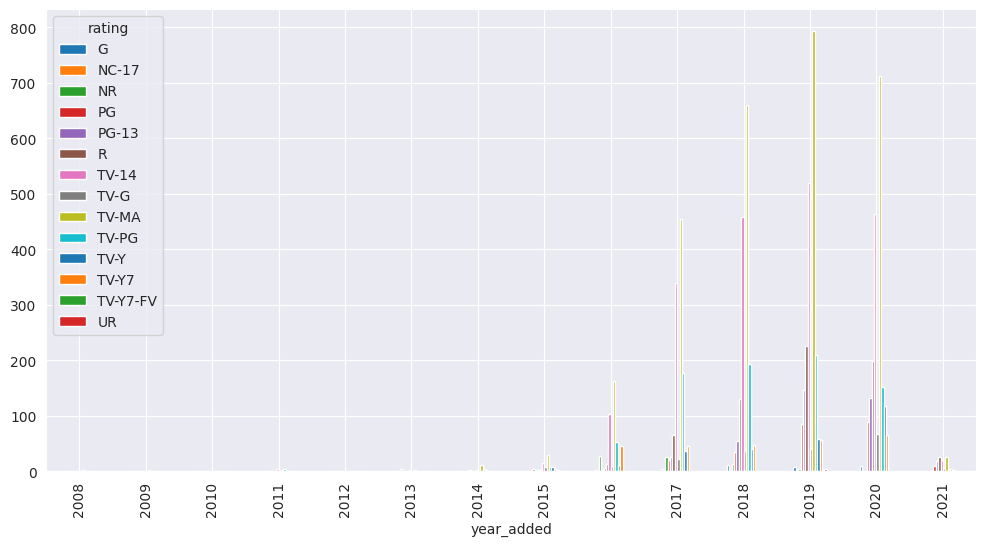

In [32]:
#1. How has the distribution of content ratings changed over time?

xx = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0).plot(kind='bar', figsize=(12, 6))

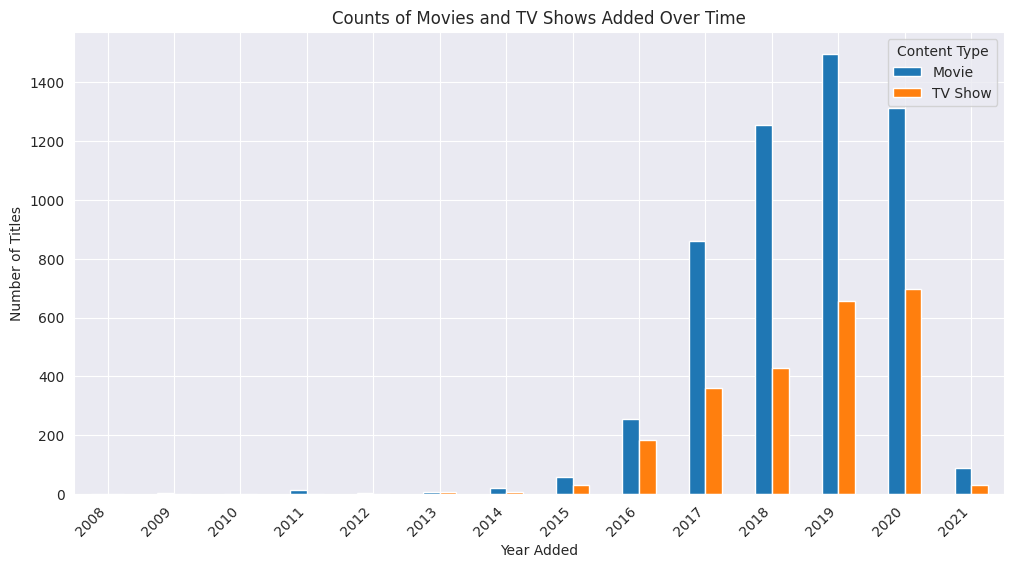

In [33]:
#2. Is there a correlation between content age and its type (Movies vs TV shows)

content_over_time = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
content_over_time.plot(kind='bar',
 figsize=(12, 6))
plt.title('Counts of Movies and TV Shows Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.show()

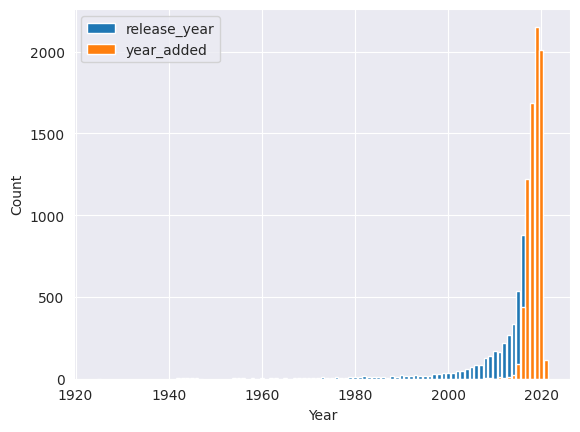

In [47]:
#3. Can we identify any trends in content prodcution based on the release year vs the year added?
added = df['year_added'].value_counts()
release = df['release_year'].value_counts()
plt.bar(release.index, release.values)
plt.bar(added.index, added.values)
plt.legend(['release_year', 'year_added'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [60]:
import string

In [61]:
#4. What are the most common word pairs or phrases
text = ' '.join(df.description).lower()
#remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

In [53]:
import nltk
nltk.download('punkt'); nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [62]:

#tokenize text
tokens = nltk.word_tokenize(text)
#remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]


<Axes: ylabel='pair'>

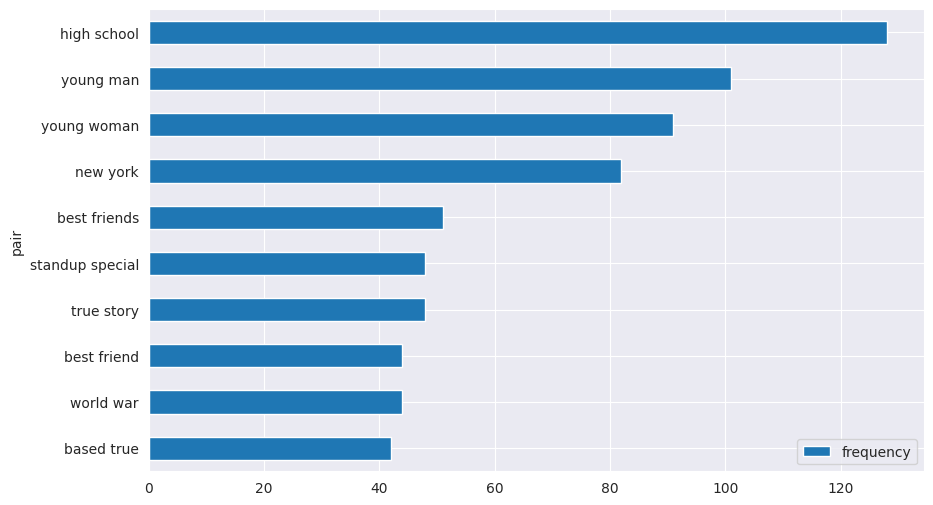

In [87]:
#generate word bigrams
bigrams = list(nltk.bigrams(filtered_tokens))
#count bigram frequencies
bigram_freq = nltk.FreqDist(bigrams)
#extract top 10
top_bigrams = bigram_freq.most_common(10)

#turn into a dataframe
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'frequency'])

top_bigrams_df['pair'] = top_bigrams_df['bigram'].apply(lambda x: ' '.join(x))
top_bigrams_df = top_bigrams_df.drop(columns='bigram')
top_bigrams_df.sort_values( 'frequency' ).plot(kind='barh', x='pair', y='frequency', figsize=(10, 6))

<Axes: ylabel='director'>

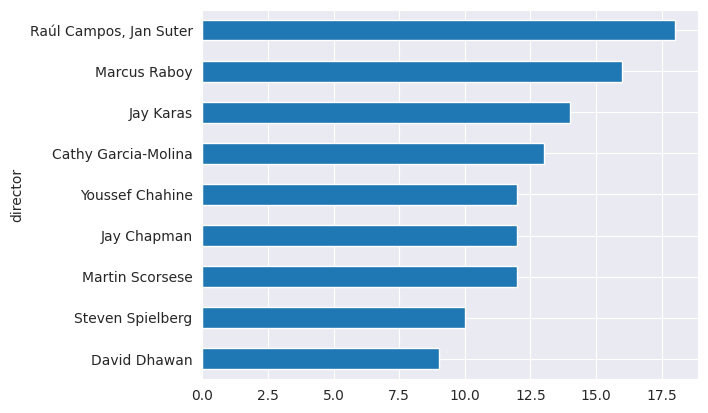

In [97]:
#5. Who are the top directors?
df.director.value_counts()[1:10:,].sort_values().plot(kind='barh', x='count', y='director')